# Problem 2: Incomplete, Positive-Only Labels

In [1]:
train_path = "data/ds3_train.csv"
valid_path = "data/ds3_valid.csv"
test_path = "data/ds3_test.csv"

In [2]:
import numpy as np
import sys
sys.path.insert(0,"/home/kasperh/Documents/MachineLearning/PS1/src")
import util
from p01b_logreg import LogisticRegression

Throughout this exercise, we assume that that the training samples are of the form $(x,t,y)$, where $x$ is the feature vector, $t$ is the true label, and $y$ is a label that is 0 or 1. We only have acces to $(x,y)$, but we want to predict the true label $t$. We assume that there are no false positives, that is, if $y=1$ (i.e. the sample is labeled), then the true label is in fact $t=1$. Our goal is to construct $h$ such that
\begin{align}
h(x)=p(t=1\mid x).
\end{align}


## (a)
In this exercise, we assume that whether a sample with true label 1 is labeled is independent of the feature vector, that is, $p(y=1\mid t=1,x)=p(y=1\mid t=1)$. Under this assumption, we show that $p(t=1\mid x)=p(y=1\mid x)/\alpha$ for some $\alpha>0$. We find that
    \begin{align}
        \frac{p(y=1\mid x)}{p(t=1\mid x)}&=\frac{p(y=1,x)p(x)}{p(t=1,x)p(x)}\\
        &=\frac{p(y=1,x)}{p(t=1,x)}\\
        &=\frac{p(t=1,y=1,x)+p(t=0,y=1,x)}{p(t=1,x)}\\
        &=\frac{p(t=1,y=1,x)}{p(t=1,x)}\\
        &=p(y=1\mid t=1,x)\\
        &=p(y=1\mid t=1)
    \end{align}
from which we conclude that
    \begin{align}
        p(t=1\mid x)=\frac{p(y=1\mid x)}{p(y=1\mid t=1)}
    \end{align}
This is as expected: the probability that the true label is $1$ is equal to the probability that the label $y=1$ divided by the probability that a sample with true label one is labeled $y=1$. For the concrete example from the problem description where we study the probability that a protein is involved in some cross-membrane signaling: $p(t=1\mid x)$ is the probability that it is involved, $p(y=1\mid x)$ is the probability that it is labeled, and $p(y=1\mid t=1)$ is the probability that a protein which is involved is labeled. 

## (b)
We want to estimate $\alpha$ using $h$ and a subset of the training set $V$ which we do not use for training. Let $V_{+} = \{x^{(i)}\in V\colon y^{(i)}=1\}$. Assume that $h(x^{(i)})\approx p(y^{(i)}=1\mid x^{(i)})$. Then for $x\in V_+$ we have that $h(x)=p(y=1\mid x)=\alpha p(t=1\mid x)=\alpha\cdot 1=\alpha$. Hence, we can estimate $\alpha$ as
    \begin{align}
        \frac{1}{|V_+|}\sum_{x\in V_+}h(x)
    \end{align}
which is what is done in the exercises.

## (c),(d), and (e)
Coding exercises.

In [3]:
x_train_t,t_train_t = util.load_dataset(train_path,label_col = "t",add_intercept = True)
x_test_t,t_test_t = util.load_dataset(test_path,label_col = "t",add_intercept = True)

x_train_y,y_train_y = util.load_dataset(train_path,label_col = "y",add_intercept = True)
x_test_y,y_test_y = util.load_dataset(test_path,label_col = "y",add_intercept = True)

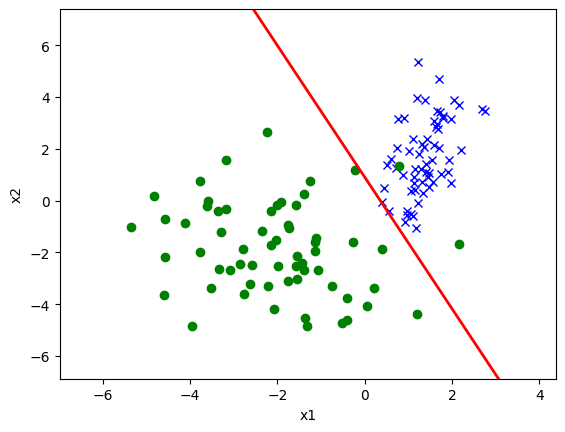

In [4]:
#Exercise (c)
logistic_T = LogisticRegression()
logistic_T.fit(x_train_t,t_train_t)
util.plot(x_test_t,t_test_t,logistic_T.theta,save_path = "plots/pred_path_c")

    # Part (c): Train and test on true labels
    # Make sure to save outputs to pred_path_c
    # Part (d): Train on y-labels and test on true labels
    # Make sure to save outputs to pred_path_d
    # Part (e): Apply correction factor using validation set and test on true labels
    # Plot and use np.savetxt to save outputs to pred_path_e

In [5]:
import matplotlib.pyplot as plt
def plot_two(x, y, theta1,name1,theta2,name2, save_path=None, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta1^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta1[0] / theta1[2] * correction + theta1[1] / theta1[2] * x1)
    plt.plot(x1, x2, c='black',label = name1, linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)
    
    # Plot decision boundary (found by solving for theta2^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -(theta2[0] / theta2[2] * correction + theta2[1] / theta2[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2,label = name2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)
    plt.legend()

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

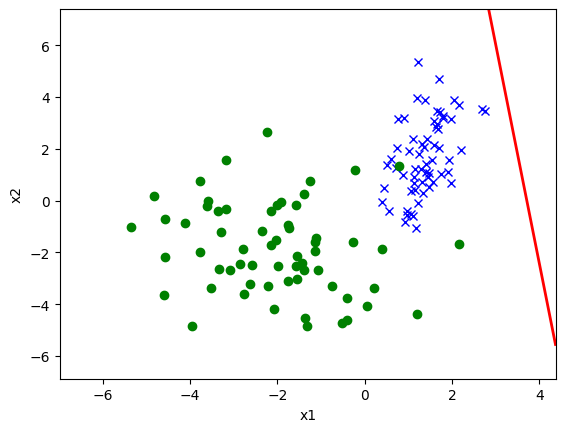

In [6]:
#Exercise (d): train classifier on y-labels
logistic_Y = LogisticRegression()
logistic_Y.fit(x_train_y,y_train_y)
util.plot(x_test_t,t_test_t,logistic_Y.theta)

In [7]:
def plot(x, y, theta, save_path=None, alpha = 0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta^T x = 0)
    margin1 = (max(x[:, -2]) - min(x[:, -2]))*0.2
    margin2 = (max(x[:, -1]) - min(x[:, -1]))*0.2
    x1 = np.arange(min(x[:, -2])-margin1, max(x[:, -2])+margin1, 0.01)
    x2 = -1/theta[2]*(theta[0] + theta[1] * x1-np.log(2/alpha-1))
    plt.plot(x1, x2, c='red', linewidth=2)
    plt.xlim(x[:, -2].min()-margin1, x[:, -2].max()+margin1)
    plt.ylim(x[:, -1].min()-margin2, x[:, -1].max()+margin2)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)

0.214638534355123


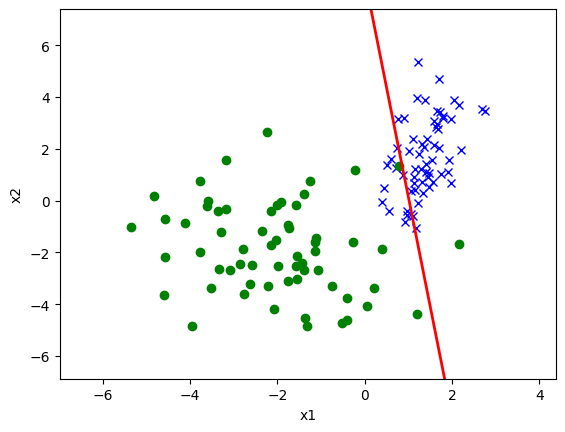

In [8]:
#Exercise (e): we estimate alpha and correct the classifier logistic_Y, by saying that
#h(x) = logistic_Y(x)/alpha, where alpha is the probability that a...
#x_valid_t,t_valid_t = util.load_dataset(train_path,label_col = "t",add_intercept = True)
x_valid_y,y_valid_y = util.load_dataset(test_path,label_col = "y",add_intercept = True)

m = len(x_valid_y)
pred = logistic_Y.predict(x_valid_y)
alpha = 0
V = 0
for i in range(m):
    #print(y_valid_y[i],pred[i])
    if(y_valid_y[i] == 1):
        V += 1
        alpha += pred[i]
alpha /= V
print(alpha)

util.plot(x_test_t,t_test_t,logistic_Y.theta,correction=1+np.log(2 / alpha - 1) / logistic_Y.theta[0])




In the code above we had the weird correction term $correction=1+\log(2 / \alpha - 1) / logistic_Y.theta[0]$ when plotting the decision boundary. This comes from solving the equation 
\begin{align}
    & 1/2=p(t=1\mid x)=\frac{p(y=1\mid x)}{\alpha}\\
    \Rightarrow & \alpha/2 = p(y=1\mid x)=ax+by+c\\
    \Rightarrow & y = -\frac{1}{b}(ax+c+\log(2/\alpha-1))=-\frac{1}{b}(c\cdot (1+\log(2 / \alpha - 1)/c+ax)
\end{align}